<a href="https://colab.research.google.com/github/Nickleon16/PINN_loudspeaker/blob/main/prueba_ciencia_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El codigo fue iniciado con un set de datos diferentes, no conte con el tiempo para hacer los cambios correspondientes, la primera parte corresponde con el set de datos real

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 Preprocesamiento de datos

## Cargar datos - archivo customer_data.csv no encontrado


datos viejos usados encontrados en: https://github.com/amankharwal/Website-data/blob/master/customers.csv


datos nuevos y reales: https://drive.google.com/file/d/1ulWxdifWTY0rCATmI2UNZ295d4OLHhDM/view?usp=drive_link

datos nuevos = df_new

In [150]:
# df = pd.read_csv("customers.csv")
df_new = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NICK/Machine_learning/datasets/customer_data.txt")
df_new.head()

,customer_id,age,gender,tenure_months,contract_type,monthly_charges,total_charges,internet_service,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,monthly_usage_gb,customer_service_calls,churn
0,1,42,Female,24,Month-to-month,74.35,1788.45,Fiber optic,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Electronic check,215.3,1.0,No
1,2,28,Male,6,Month-to-month,60.15,371.85,Fiber optic,Yes,No,...,No,No,No,No,No,Yes,Electronic check,134.7,0.0,Yes
2,3,57,Male,36,One year,82.55,2927.85,Fiber optic,Yes,No,...,Yes,No,Yes,Yes,No,Yes,Credit card (automatic),187.2,0.0,No
3,4,35,Female,12,Month-to-month,55.25,671.75,DSL,Yes,No,...,No,No,No,No,No,No,Bank transfer (automatic),98.4,1.0,No
4,5,61,Female,58,Two year,92.85,5293.30,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),243.6,0.0,No


## Limpiar datos y valores atipicos

Para iniciar el preprocesamiento de datos reviso que tipo de datos estoy manejando con ayuda de .info

In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             144 non-null    int64  
 1   age                     144 non-null    int64  
 2   gender                  144 non-null    object 
 3   tenure_months           144 non-null    int64  
 4   contract_type           144 non-null    object 
 5   monthly_charges         144 non-null    float64
 6   total_charges           144 non-null    float64
 7   internet_service        144 non-null    object 
 8   phone_service           143 non-null    object 
 9   multiple_lines          143 non-null    object 
 10  online_security         143 non-null    object 
 11  online_backup           143 non-null    object 
 12  device_protection       143 non-null    object 
 13  tech_support            143 non-null    object 
 14  streaming_tv            143 non-null    ob

En esta base de datos, en primera instancia se aprecia que:

*   Existen datos categoricos
*   Hay un valor faltante para varias categorias
*   La columna customer_id no aporta informacion relevante
*   Varias categorias son de tipo bool



In [152]:
# Eliminare datos repetidos y ya que son pocos datos faltantes, tambien los
# eliminare
print("Tamanño inicial: ", df_new.shape)
df_new.drop_duplicates(inplace=True)
df_new.dropna(inplace=True)
df_new.drop("customer_id", axis=1, inplace=True)

print("Tamanño final: ", df_new.shape)

Tamanño inicial:  (144, 21)
Tamanño final:  (143, 20)


## Normalizar variables numericas

In [153]:
# Separar variables de tipo categorico de numerico
categoricas = df_new.select_dtypes(include="object")
numericas = df_new.select_dtypes(exclude="object")

numericas.head()

,age,tenure_months,monthly_charges,total_charges,monthly_usage_gb,customer_service_calls
0,42,24,74.35,1788.45,215.3,1.0
1,28,6,60.15,371.85,134.7,0.0
2,57,36,82.55,2927.85,187.2,0.0
3,35,12,55.25,671.75,98.4,1.0
4,61,58,92.85,5293.30,243.6,0.0


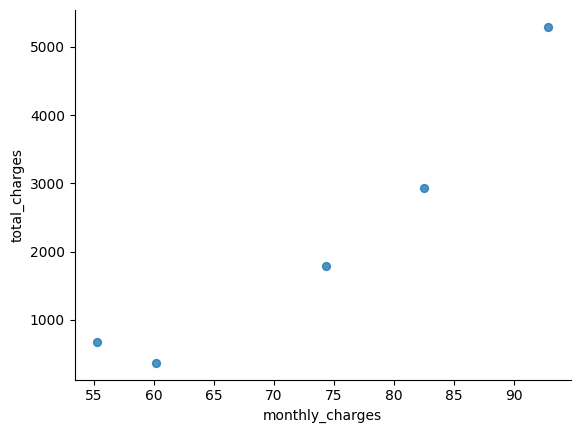

In [154]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='monthly_charges', y='total_charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [155]:
print(df_new['customer_service_calls'].unique())

[1. 0. 2. 3. 4. 5.]


In [156]:
# scaler = StandardScaler()
# numericas_std = scaler.fit_transform(numericas)
# numericas_std = pd.DataFrame(numericas_std, columns=numericas.columns)
# numericas_std.head()

## Codificar Variables categoricas

En este caso las variables categoricas booleanas se pueden codificar de forma binaria

In [157]:
categoricas.head()

,gender,contract_type,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,churn
0,Female,Month-to-month,Fiber optic,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Electronic check,No
1,Male,Month-to-month,Fiber optic,Yes,No,No,No,No,No,No,No,Yes,Electronic check,Yes
2,Male,One year,Fiber optic,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Credit card (automatic),No
3,Female,Month-to-month,DSL,Yes,No,Yes,No,No,No,No,No,No,Bank transfer (automatic),No
4,Female,Two year,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),No


In [126]:
df_new['phone_service'].unique()

array(['Yes', 'No'], dtype=object)

In [158]:
diccionario = {'Yes': 0, 'No': 1, 'Female': 0, 'Male': 1}

for columna in categoricas.columns:
  if df_new[columna][1] == 'Yes' or df_new[columna][1] == 'No' or df_new[columna][1] == 'Female' or df_new[columna][1] =='Male':

    df_new[columna] = df_new[columna].map(diccionario)
df_new.head()

,age,gender,tenure_months,contract_type,monthly_charges,total_charges,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,monthly_usage_gb,customer_service_calls,churn
0,42,0,24,Month-to-month,74.35,1788.45,Fiber optic,0,0.0,1,1,0,1,0,0,0,Electronic check,215.3,1.0,1
1,28,1,6,Month-to-month,60.15,371.85,Fiber optic,0,1.0,1,1,1,1,1,1,0,Electronic check,134.7,0.0,0
2,57,1,36,One year,82.55,2927.85,Fiber optic,0,1.0,0,0,1,0,0,1,0,Credit card (automatic),187.2,0.0,1
3,35,0,12,Month-to-month,55.25,671.75,DSL,0,1.0,0,1,1,1,1,1,1,Bank transfer (automatic),98.4,1.0,1
4,61,0,58,Two year,92.85,5293.30,Fiber optic,0,0.0,0,0,0,0,0,0,0,Bank transfer (automatic),243.6,0.0,1


In [159]:
categoricas = df_new.select_dtypes(include="object")
categoricas.head()

,contract_type,internet_service,payment_method
0,Month-to-month,Fiber optic,Electronic check
1,Month-to-month,Fiber optic,Electronic check
2,One year,Fiber optic,Credit card (automatic)
3,Month-to-month,DSL,Bank transfer (automatic)
4,Two year,Fiber optic,Bank transfer (automatic)


In [133]:
print(df_new['contract_type'].unique())
print(df_new['internet_service'].unique())
print(df_new['payment_method'].unique())

['Month-to-month' 'One year' 'Two year']
['Fiber optic' 'DSL']
['Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Mailed check']


In [136]:
pd.get_dummies(df_new['contract_type'],  dtype=float)
df_new = pd.concat([df_new, pd.get_dummies(df_new['contract_type'],  dtype=float)], axis=1)

,Month-to-month,One year,Two year
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
138,1.0,0.0,0.0
139,0.0,0.0,1.0
140,1.0,0.0,0.0
141,0.0,1.0,0.0


## Crear nuevas variables de interes

Normalmente se obtienen nuevas variables de interes analisando o combinando otros datos que se relacionen de modo que generen un nuevo dato relevante. Ya sea mediante el producto u otra operacion

# 1.2 Visualizacion de Datos

En la visualizacion de datos es posible mostrar un diagrama de cajas (Box plot) que permita ver en los datos categoricos que valores son atipicos

Tambien es posible hacer una matriz de calor que muestre la relacion que tiene un dato con otro y observar que columnas contienen informacion mas relevante

Tambien es posible histogramas para ver la distribucion de los datos y las tendencias

<Axes: xlabel='age', ylabel='Count'>

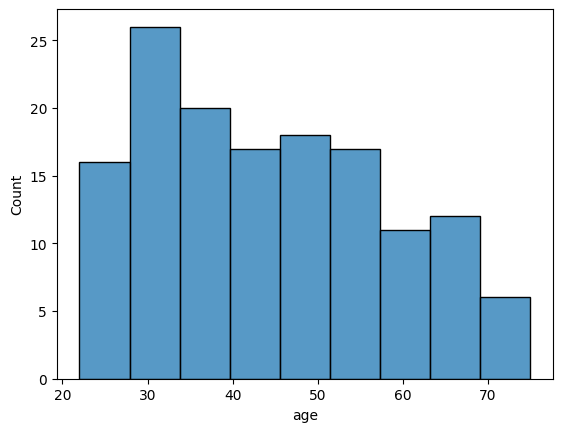

In [166]:
sns.histplot(df_new['age'])

<Axes: xlabel='internet_service', ylabel='Count'>

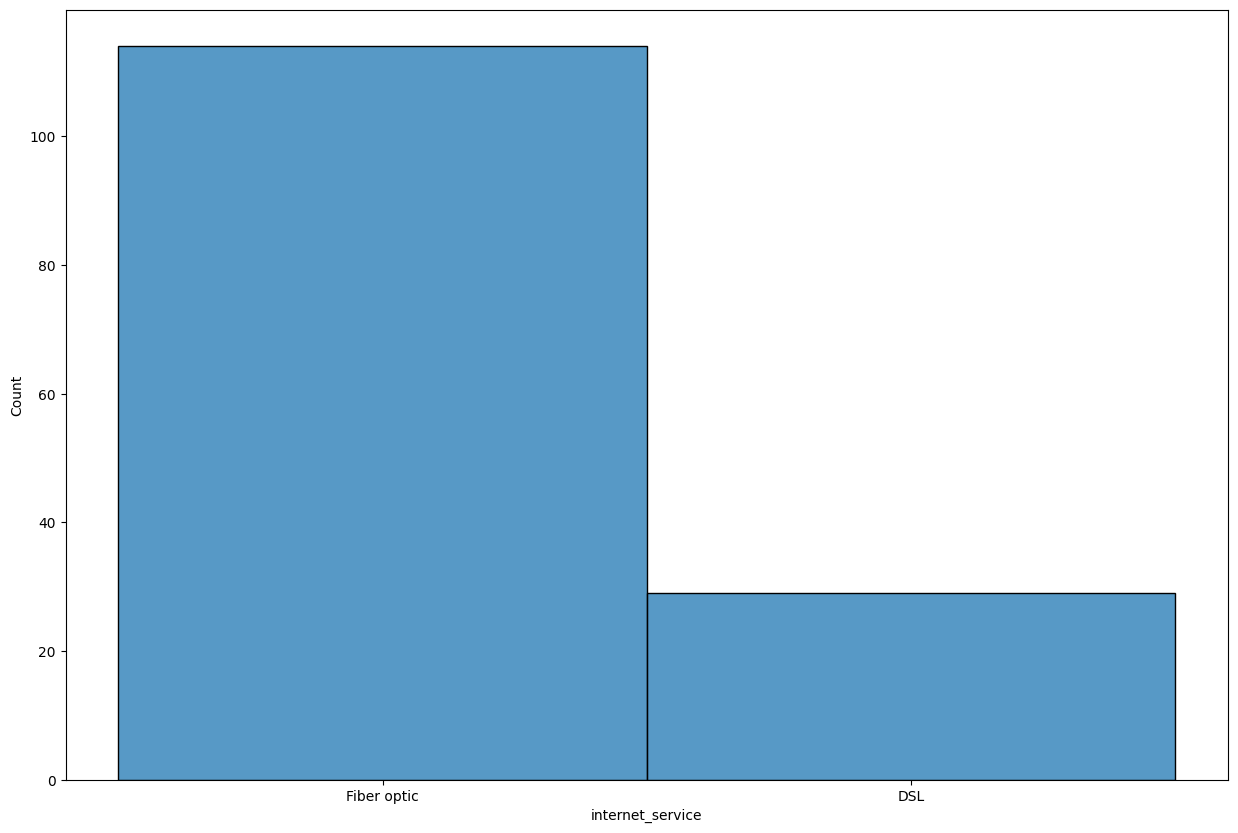

In [168]:
plt.figure(figsize=(15,10))
sns.histplot(df_new['internet_service'])

In [169]:
# plt.figure(figsize=(15,10))
# plt.title("Box plot")
# sns.boxplot(data=df_new['monthly_usage_gb'])

# 2.1 Modelado

El data set realmente no estaba diseñado para categorizar, sin embargo, usare la columna spending score, como la variable a predecir. Por este motivo realmente no se espera que el modelo aprenda a categorizar

Seria mas apropiado tecnicas de cluster para datos sin etiquetas

## Separacion de datos de entrenamiento y prueba

In [42]:
x = df.drop("Spending Score (1-100)", axis=1)
y = df["Spending Score (1-100)"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

## Entrenamiento de modelos

In [53]:
modelo_linear = LinearRegression()
modelo_bosque = RandomForestRegressor(random_state=1)

modelo_linear.fit(X_train, y_train)
modelo_bosque.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

## Comparacion de resultados

Es posible usar otras metricas como el error cuadratico medio, sin embargo, debido al dataset elegido esto no agrega ningun

In [56]:
print(modelo_linear.score(X_test, y_test))
print(modelo_bosque.score(X_test, y_test))

-0.0016010103781811669
0.07800642252857082


## Hiperparametros

En este caso de ajuste del parametro profundidad, no hay cambios significativos, del mismo modo se podrian probar otros parametros pero es poco probable que generen cambios significativos

In [58]:
# ajuste de la profundida del random forest

deep_sizes = [10, 20, 50, 100, 200, 500, 1000]

scores = []

for size in deep_sizes:
    modelo = RandomForestRegressor(random_state=1, max_depth=size)
    modelo.fit(X_train, y_train)
    puntaje = modelo.score(X_test, y_test)
    scores.append(puntaje)

    print(f"Para {size}; el score es: {puntaje}")

print("Menor score = ", min(scores))

Para 10; el score es: 0.09009784167459778
Para 20; el score es: 0.07800642252857082
Para 50; el score es: 0.07800642252857082
Para 100; el score es: 0.07800642252857082
Para 200; el score es: 0.07800642252857082
Para 500; el score es: 0.07800642252857082
Para 1000; el score es: 0.07800642252857082
Menor score =  0.07800642252857082


# Interpretacion del Modelo

## Caracteristicas

## Insights

##3. Deep learning

## 4. SQL

## a. Salario empleado superior al promedio

FROM EMPLOYEES e

SELECT e.employee_id, e.first_name, e.last_name, e.salary, e.deparmet_id


WHERE e.department_id == e.department_id(

  WHERE e.salary > (SELECT average(e.salary));

);

## b. Salario promedio managers

FROM EMPLOYEES e

DEPARTMENTS d ON e.department_id

LOCATIONS i ON d.locaton_id

COUNTRIES c ON c.country_id

REGIONS r ON r.region_id

WHERE e.manager_id(

  average(e.salary)

);


GROUP BY r.region_name

## c. Lista empleados y managers por departamento

FROM EMPLOYEES e

SELECT e.employee_id, e.manager_id, e.last_name, e.manager_id, last_name,

DEPARTMENT d ON department_name

ORDER BY d.department_name